# Prescribed vegetation cover
Preliminary results showed generally an off-set between observed and modelled vegetation cover. Here, vegetation cover derived from remote sensing (Donohue et al. 2008) is used as input for the VOM, and compared to the VOM-results that optimize this.

## Timeseries of vegetation cover
The data from Donohue et al. (2008) generally covers just a few years, whereas the VOM needs to be run from 1980 untill 2017. Therefore, timeseries were constructed by taking the monthly mean values of Donohue et al. (2008) for the missing years. 


In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta, date
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from scipy.misc import imread
import matplotlib.cbook as cbook

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
#read seasonal projective cover data used as input for the VOM
pc_howard = np.genfromtxt("../../work/additional_analyses/prescribed_cover/HowardSprings/input/perc_cov.txt")  #mm/d
pc_adelaide = np.genfromtxt("../../work/additional_analyses/prescribed_cover/AdelaideRiver/input/perc_cov.txt")  #mm/d
pc_litch = np.genfromtxt("../../work/additional_analyses/prescribed_cover/Litchfield/input/perc_cov.txt")  #mm/d
pc_daly = np.genfromtxt("../../work/additional_analyses/prescribed_cover/DalyUncleared/input/perc_cov.txt")  #mm/d
pc_dry = np.genfromtxt("../../work/additional_analyses/prescribed_cover/DryRiver/input/perc_cov.txt")  #mm/d
pc_sturt = np.genfromtxt("../../work/additional_analyses/prescribed_cover/SturtPlains/input/perc_cov.txt")  #mm/d

time = np.arange(datetime(int(pc_howard[0,3]),int(pc_howard[0,2]),int(pc_howard[0,1])), 
                  datetime(int(pc_howard[-1,3]),int(pc_howard[-1,2]),int(pc_howard[-1,1]))+timedelta(days=1), 
                  timedelta(days=1)).astype(datetime)


In [3]:
#read in fpar-data

fparv5_howard = np.loadtxt('../../data/fPAR/fpar_howard_v5.txt',delimiter=',', usecols=3 )
fparv5_adelaide = np.loadtxt('../../data/fPAR/fpar_adelaide_v5.txt',delimiter=',', usecols=3 )
fparv5_litch = np.loadtxt('../../data/fPAR/fpar_litchfield_v5.txt',delimiter=',', usecols=3 )
fparv5_daly = np.loadtxt('../../data/fPAR/fpar_daly_v5.txt',delimiter=',', usecols=3 )
fparv5_dry = np.loadtxt('../../data/fPAR/fpar_dry_v5.txt',delimiter=',', usecols=3 )
fparv5_sturt = np.loadtxt('../../data/fPAR/fpar_sturt_v5.txt',delimiter=',', usecols=3 )

fparv5_dates = np.genfromtxt('../../data/fPAR/dates_v5', dtype='str', delimiter=',')
fparv5_dates = pd.to_datetime(fparv5_dates[:,1], format="%Y%m")


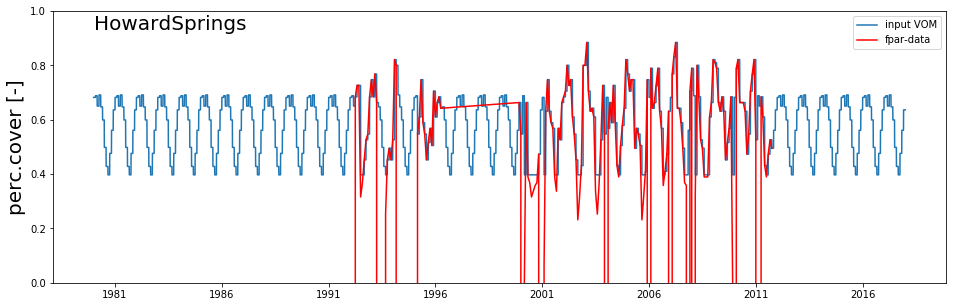

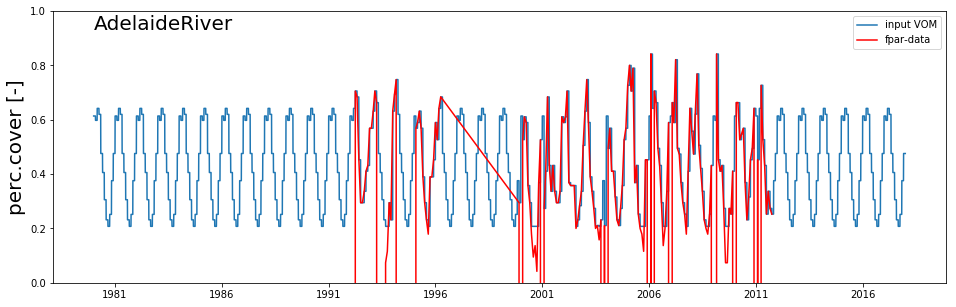

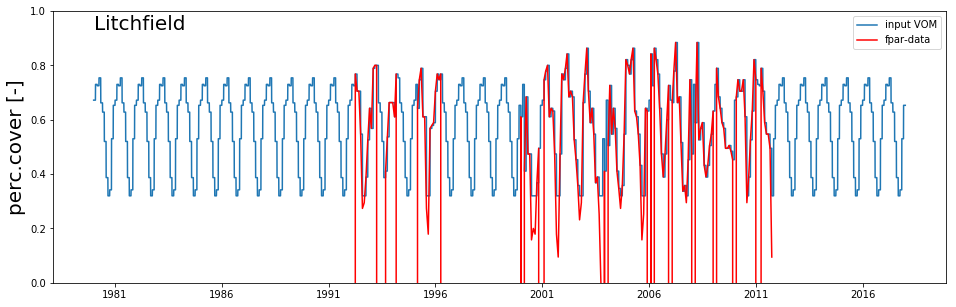

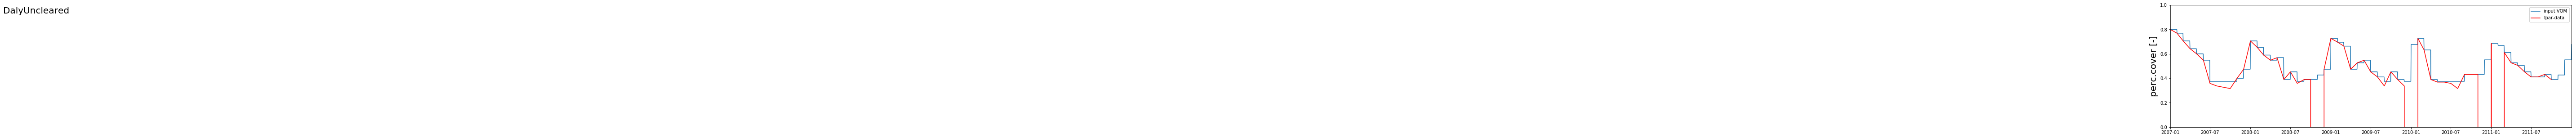

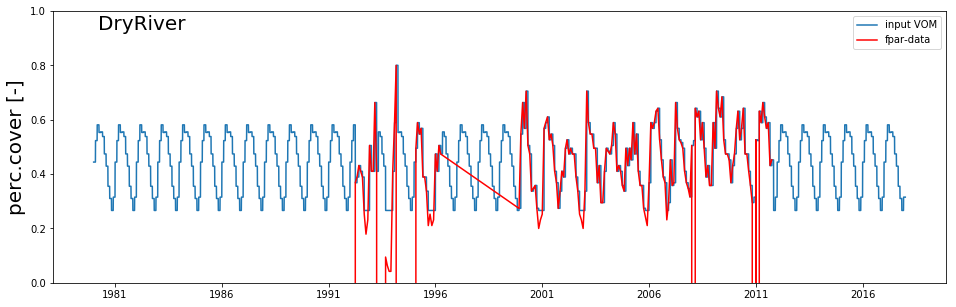

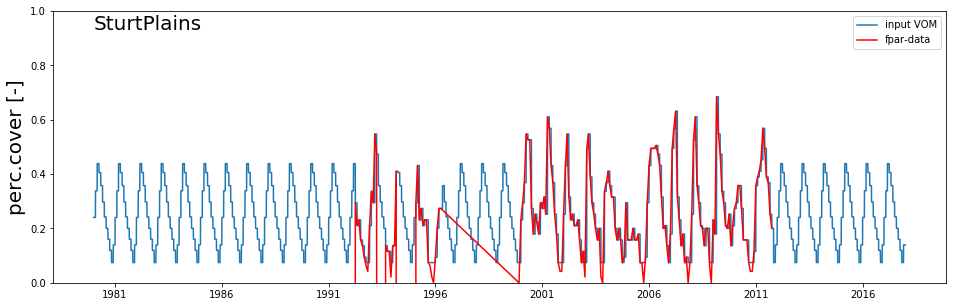

In [13]:

pc_t = [ 0.3971929824561404, 0.20771929824561405, 0.320,
        0.37473684210526315, 0.26616541353383455, 0.07443609022556391]


#howardsprings
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))    
ax.plot(time, pc_howard[:,4] + pc_t[0], label = "input VOM")
ax.plot(fparv5_dates, fparv5_howard/0.95, color="red", label="fpar-data")
ax.set_ylabel("perc.cover [-]", fontsize=20)
ax.set_ylim([0,1])
ax.text(time[2], 0.95, "HowardSprings", ha='left', va='center', fontsize=20)
plt.legend()

#AdelaideRiver
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))        
ax.plot(time, pc_adelaide[:,4] + pc_t[1], label = "input VOM")
ax.plot(fparv5_dates, fparv5_adelaide/0.95, color="red", label="fpar-data")
ax.set_ylabel("perc.cover [-]", fontsize=20)
ax.set_ylim([0,1])
ax.text(time[2], 0.95, "AdelaideRiver", ha='left', va='center', fontsize=20)
plt.legend()

#Litchfield
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))        
ax.plot(time, pc_litch[:,4]+ pc_t[2], label = "input VOM")
ax.plot(fparv5_dates, fparv5_litch/0.95, color="red", label="fpar-data")
ax.set_ylabel("perc.cover [-]", fontsize=20)
ax.set_ylim([0,1])
ax.text(time[2], 0.95, "Litchfield", ha='left', va='center', fontsize=20)
plt.legend()

#DalyUncleared
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))        
ax.plot(time, pc_daly[:,4] + pc_t[3], label = "input VOM")
ax.plot(fparv5_dates, fparv5_daly/0.95, color="red", label="fpar-data")
ax.set_ylabel("perc.cover [-]", fontsize=20)
ax.set_ylim([0,1])
ax.set_xlim([datetime(2007,1, 1), datetime( 2011 ,12, 31)]) 

ax.text(time[2], 0.95, "DalyUncleared", ha='left', va='center', fontsize=20)
plt.legend()

#DryRiver
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))        
ax.plot(time, pc_dry[:,4] + pc_t[4], label = "input VOM")
ax.plot(fparv5_dates, fparv5_dry/0.95, color="red", label="fpar-data")
ax.set_ylabel("perc.cover [-]", fontsize=20)
ax.set_ylim([0,1])
#ax.set_xlim([datetime(2002,1, 1), datetime( 2006 ,12, 31)]) 
ax.text(0.05, 0.95, "DryRiver", ha='left', va='center', fontsize=20, transform=ax.transAxes)
plt.legend()

#SturtPlains
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))        
ax.plot(time, pc_sturt[:,4] + pc_t[5], label = "input VOM")
ax.plot(fparv5_dates, fparv5_sturt/0.95, color="red", label="fpar-data")
ax.set_ylabel("perc.cover [-]", fontsize=20)
ax.set_ylim([0,1])
ax.text(time[2], 0.95, "SturtPlains", ha='left', va='center', fontsize=20)
plt.legend()
plt.show()


Values of vegetation cover used to run the VOM, missing data was filled with the mean values for each month.

## Timeseries of evaporation

/home/remko/.local/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


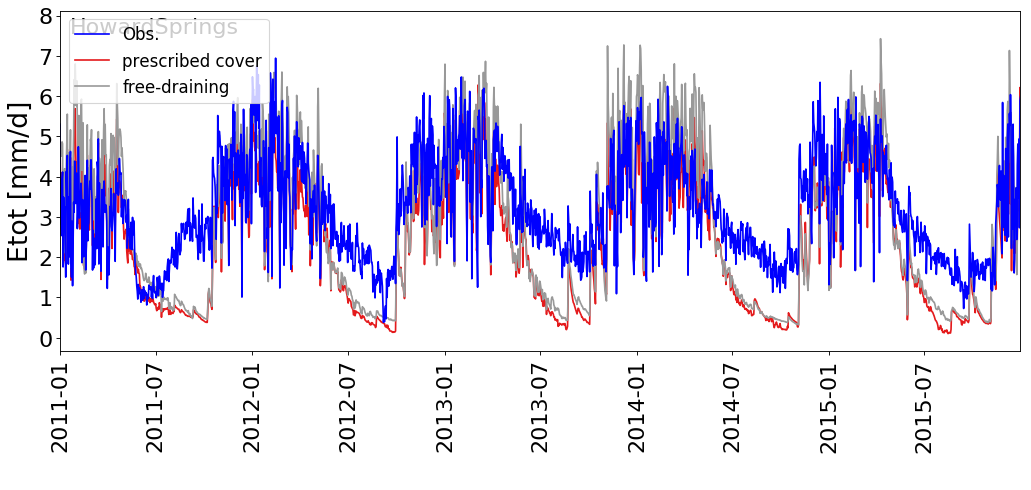

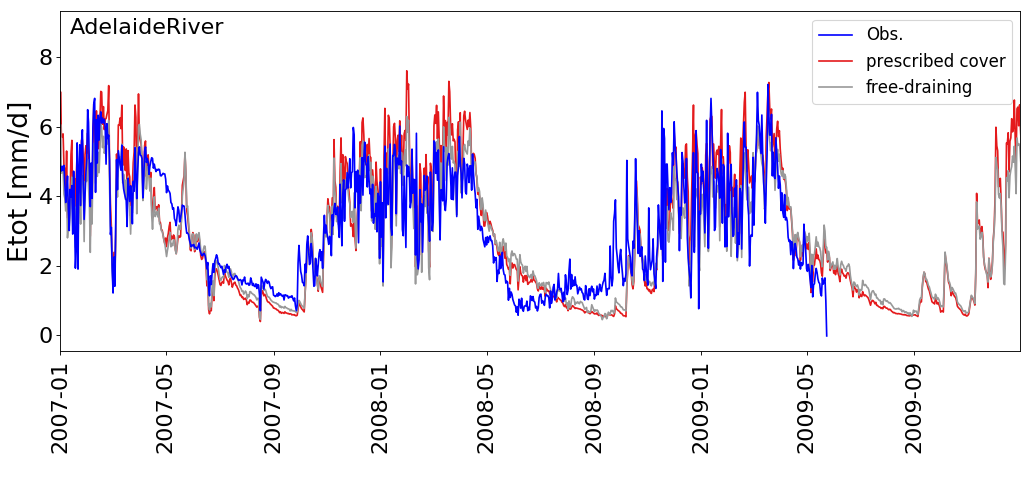

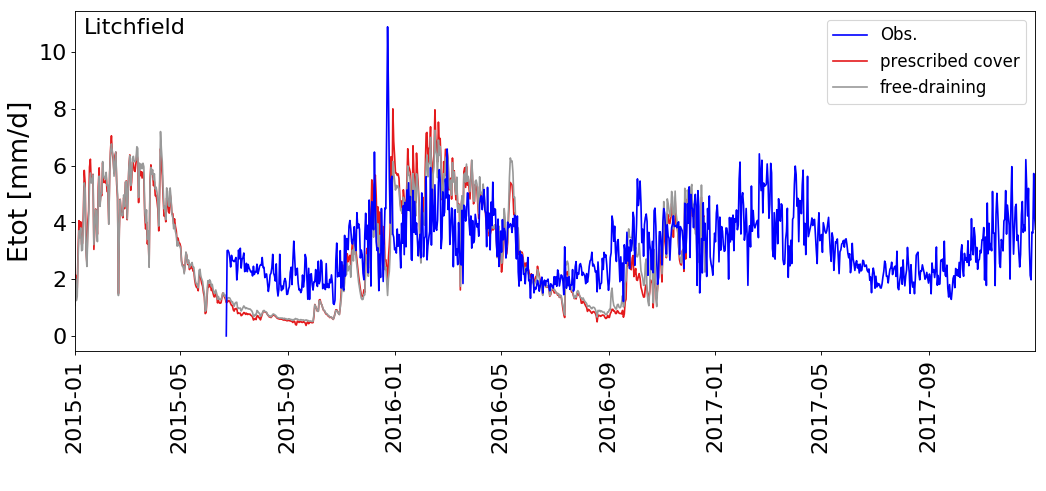

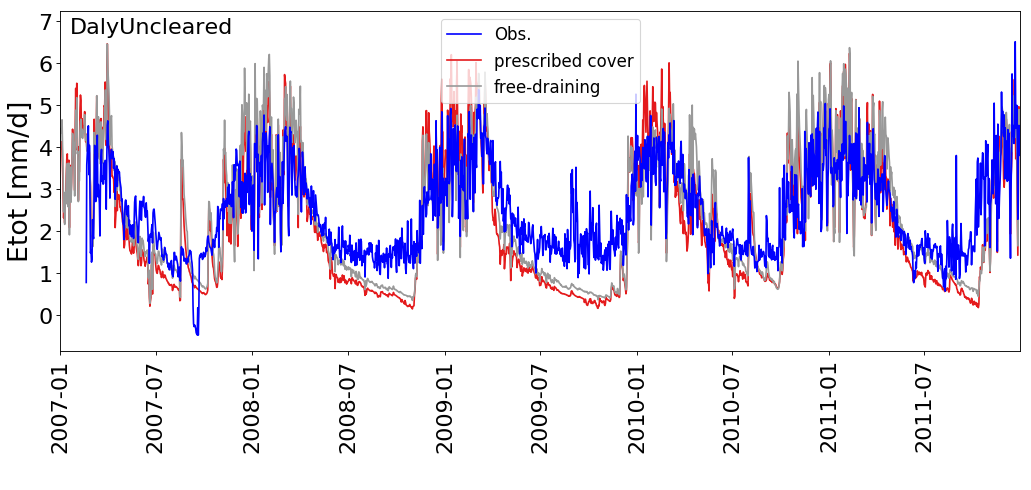

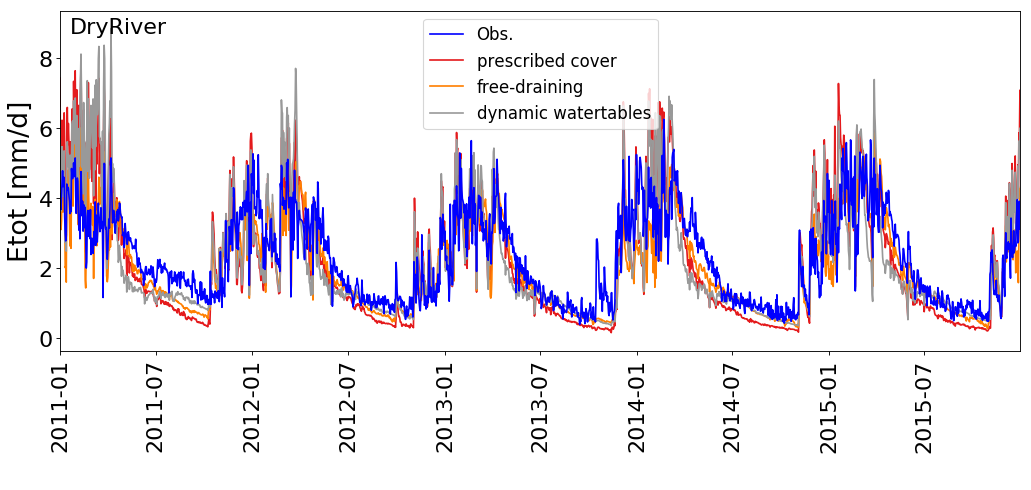

OSError: ../../data/VOM_output/additional_analyses/prescribed_cover/SturtPlains/sce_best/results_daily.txt not found.

In [5]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/HowardSprings/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v evaptot -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "prescribed cover" "free-draining" "dynamic watertables" --title "HowardSprings" --legend True  \
--palette Set1

#AdelaideRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/AdelaideRiver/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v evaptot -ys 2007 -ye 2009 -w ../../data/VOM_input/AdelaideRiver/dailyweather.prn \
--obs ../../data/DINGO/Ea_adelaide.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "prescribed cover" "free-draining" "dynamic watertables" --title "AdelaideRiver" --legend True  \
--palette Set1

#Litchfield
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/Litchfield/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v evaptot -ys 2015 -ye 2017 -w ../../data/VOM_input/Litchfield/dailyweather.prn \
--obs ../../data/DINGO/Ea_litch.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "prescribed cover" "free-draining" "dynamic watertables" --title "Litchfield" --legend True  \
--palette Set1

#DalyUncleared
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/DalyUncleared/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v evaptot -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
--obs ../../data/DINGO/Ea_daly.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "prescribed cover" "free-draining" "dynamic watertables" --title "DalyUncleared" --legend True  \
--palette Set1

#DryRiver -- still on HPC
%run ../../src_py/plot_et_ass.py  \
-i ../../../../dryriver_tests/data/VOM_output/additional_analyses/prescribed_cover/DryRiver/sce_best_tmp/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../../../dryriver_tests/data/VOM_output/additional_analyses/prescribed_cover/DryRiver/sce_best_tmp_k/results_daily.txt \
-v evaptot -ys 2011 -ye 2015 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
--obs ../../data/DINGO/Ea_dry.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "prescribed cover" "free-draining" "dynamic watertables" --title "DryRiver" --legend True  \
--palette Set1

#SturtPlains
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/SturtPlains/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v evaptot -ys 2009 -ye 2014 -w ../../data/VOM_input/SturtPlains/dailyweather.prn \
--obs ../../data/DINGO/Ea_sturt.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "prescribed cover" "free-draining" "dynamic watertables" --title "SturtPlains" --legend True  \
--palette Set1




The results with prescribed vegetation cover are at least similar to the results that optimize vegetation cover. Generally, the VOM deviates a bit more from the observations when vegetation is prescribed. 

### Transpiration trees

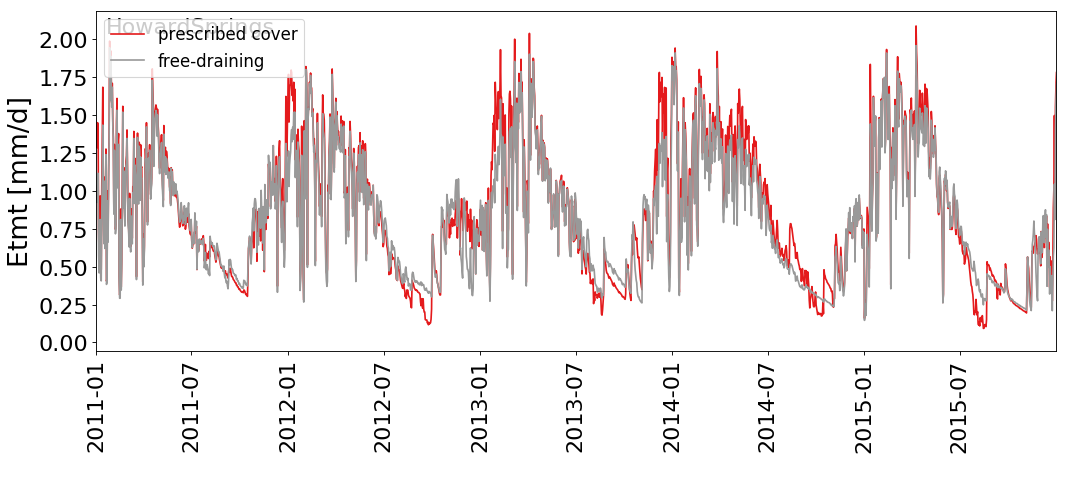

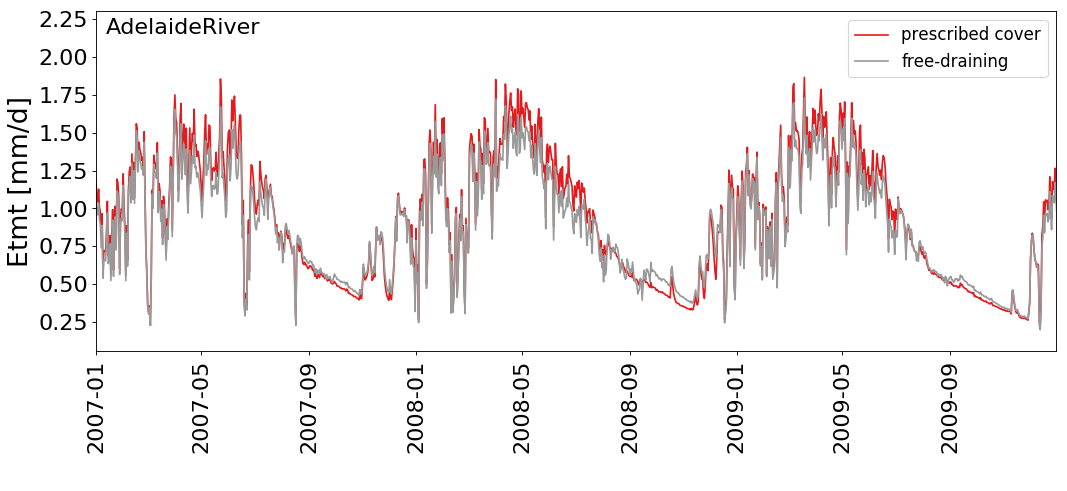

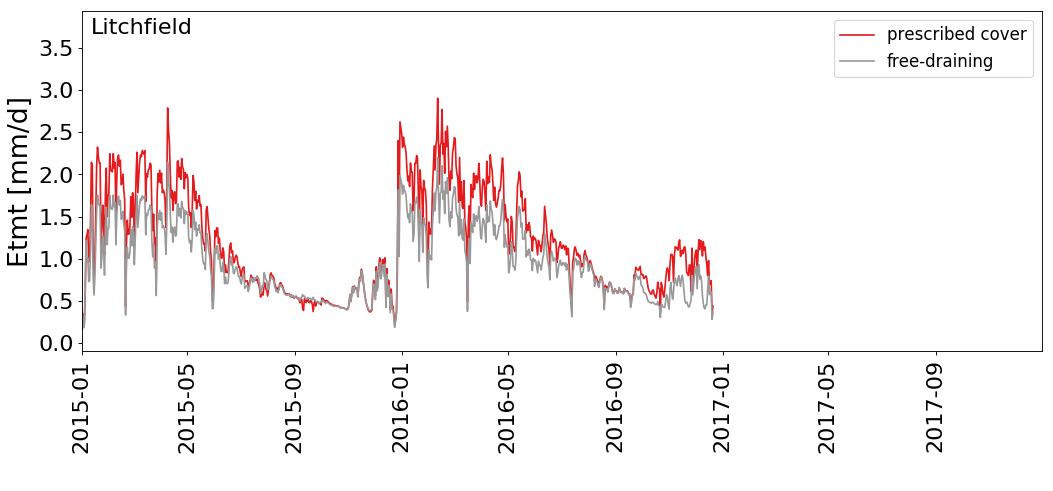

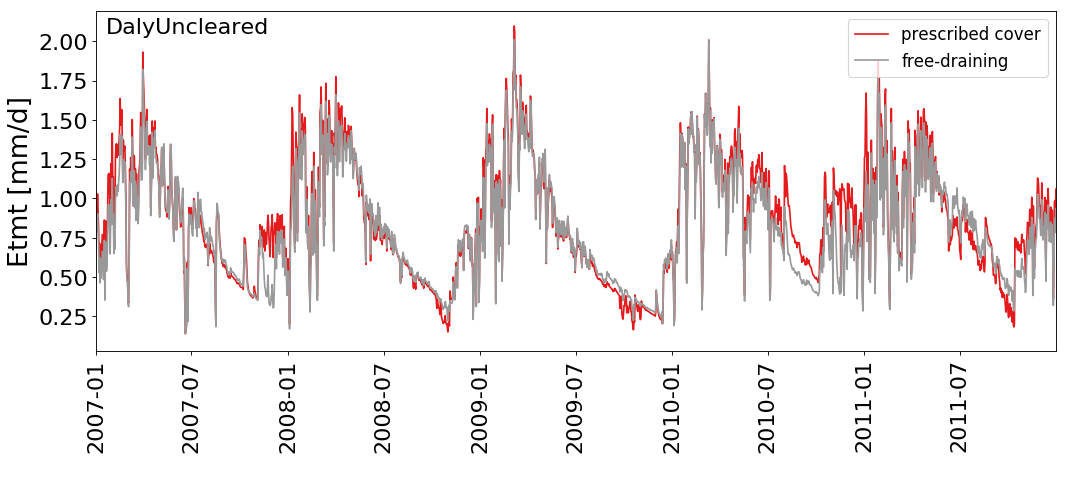

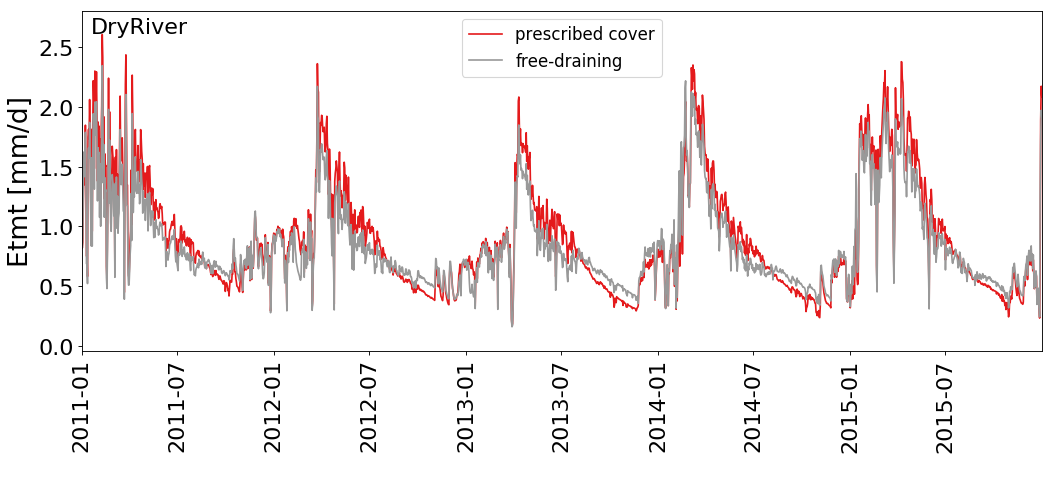

OSError: ../../data/VOM_output/additional_analyses/prescribed_cover/SturtPlains/sce_best/results_daily.txt not found.

In [7]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/HowardSprings/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.2/sce_best/results_daily.txt \
-v etmt -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--mf 1000 --ylabel "Etmt [mm/d]" \
--labels "prescribed cover" "free-draining" "dynamic watertables" --title "HowardSprings" --legend True  \
--palette Set1

#AdelaideRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/AdelaideRiver/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt \
-v etmt -ys 2007 -ye 2009 -w ../../data/VOM_input/AdelaideRiver/dailyweather.prn \
--mf 1000 --ylabel "Etmt [mm/d]" \
--labels "prescribed cover" "free-draining" "dynamic watertables" --title "AdelaideRiver" --legend True  \
--palette Set1

#Litchfield
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/Litchfield/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.2/sce_best/results_daily.txt \
-v etmt -ys 2015 -ye 2017 -w ../../data/VOM_input/Litchfield/dailyweather.prn \
--mf 1000 --ylabel "Etmt [mm/d]" \
--labels "prescribed cover" "free-draining" "dynamic watertables" --title "Litchfield" --legend True  \
--palette Set1

#DalyUncleared
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/DalyUncleared/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.2/sce_best/results_daily.txt \
-v etmt -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
--mf 1000 --ylabel "Etmt [mm/d]" \
--labels "prescribed cover" "free-draining" "dynamic watertables" --title "DalyUncleared" --legend True  \
--palette Set1

#DryRiver -- still on HPC
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/DryRiver/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt \
-v etmt -ys 2011 -ye 2015 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
--mf 1000 --ylabel "Etmt [mm/d]" \
--labels "prescribed cover" "free-draining" "old soil param." --title "DryRiver" --legend True  \
--palette Set1

#SturtPlains
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/SturtPlains/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.2/sce_best/results_daily.txt \
-v etmt -ys 2009 -ye 2014 -w ../../data/VOM_input/SturtPlains/dailyweather.prn \
--mf 1000 --ylabel "Etmt [mm/d]" \
--labels "prescribed cover" "free-draining" "dynamic watertables" --title "SturtPlains" --legend True  \
--palette Set1




The transpiration of trees is generally lower in case of prescribed vegetation cover.

### Transpiration grasses

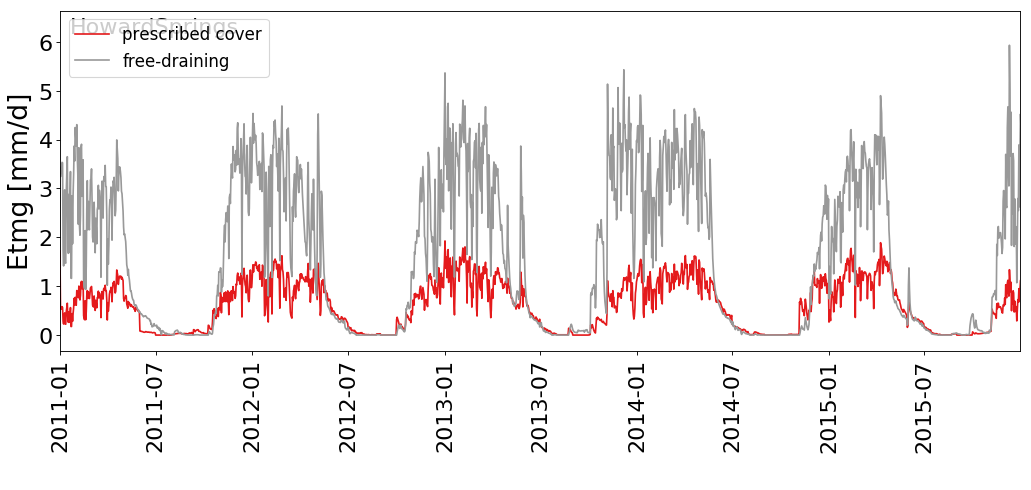

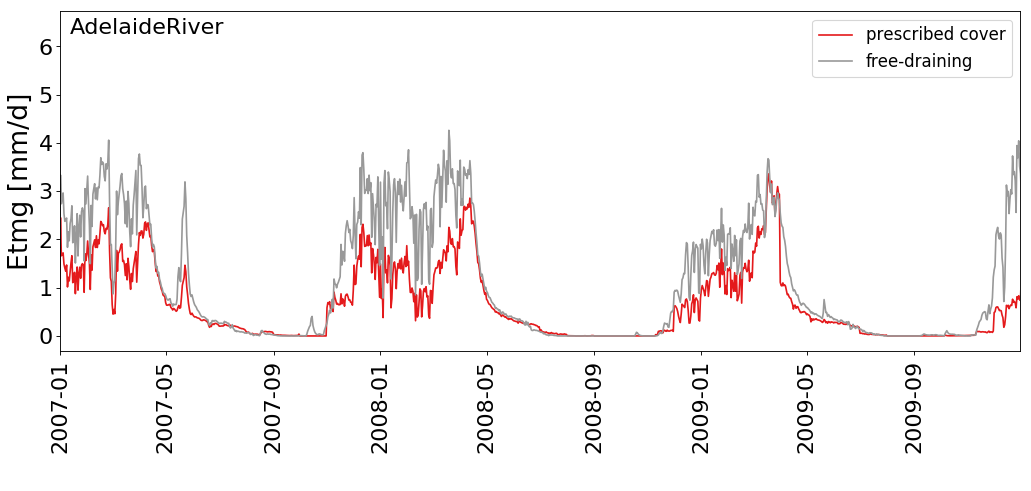

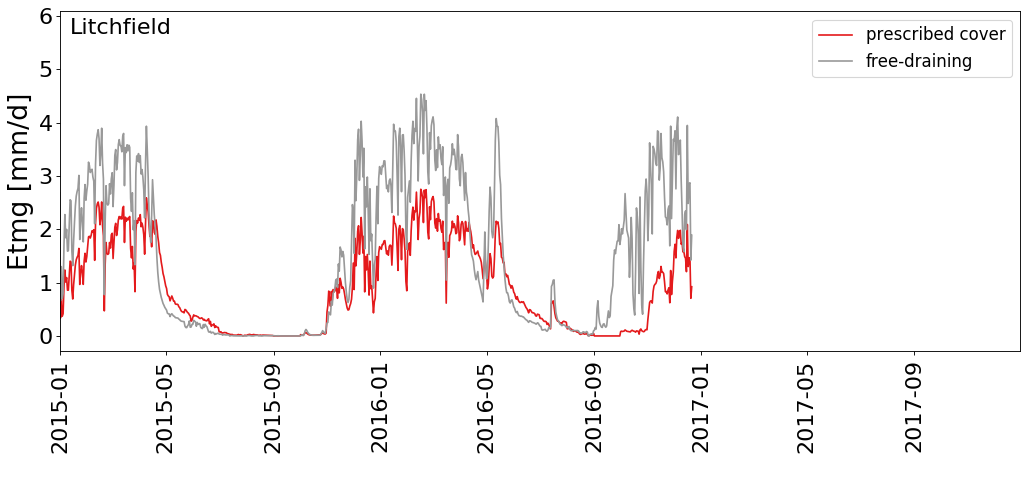

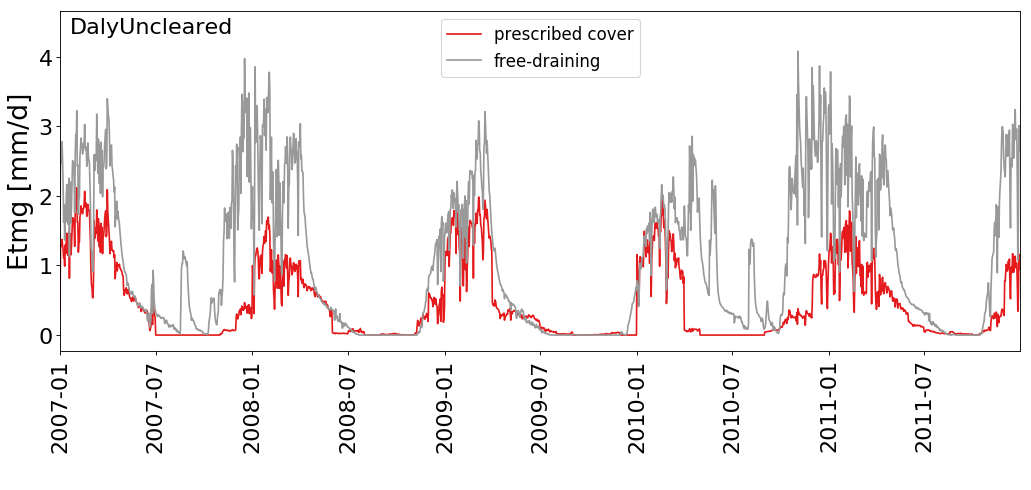

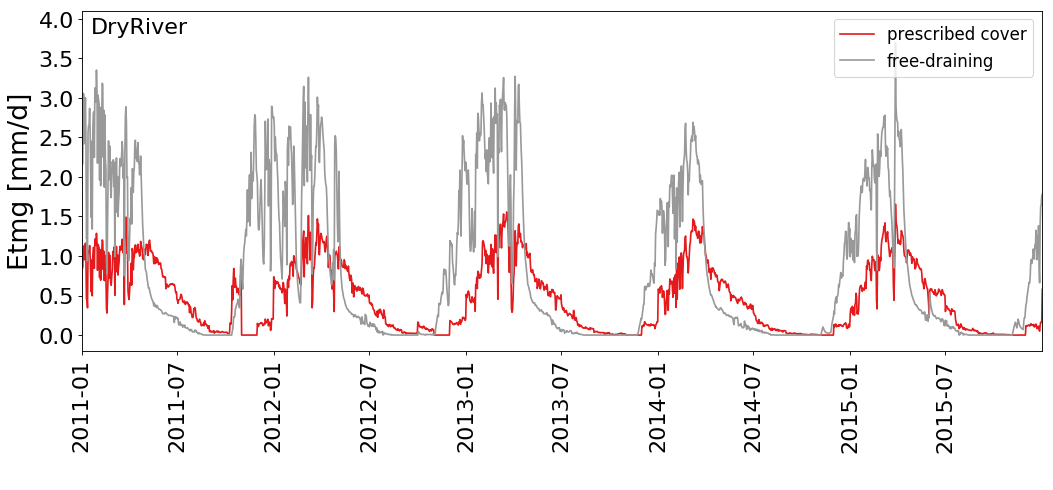

OSError: ../../data/VOM_output/additional_analyses/prescribed_cover/SturtPlains/sce_best/results_daily.txt not found.

In [8]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/HowardSprings/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.2/sce_best/results_daily.txt \
-v etmg -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--mf 1000 --ylabel "Etmg [mm/d]" \
--labels "prescribed cover" "free-draining" "dynamic watertables" --title "HowardSprings" --legend True  \
--palette Set1

#AdelaideRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/AdelaideRiver/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt \
-v etmg -ys 2007 -ye 2009 -w ../../data/VOM_input/AdelaideRiver/dailyweather.prn \
--mf 1000 --ylabel "Etmg [mm/d]" \
--labels "prescribed cover" "free-draining" "dynamic watertables" --title "AdelaideRiver" --legend True  \
--palette Set1

#Litchfield
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/Litchfield/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.2/sce_best/results_daily.txt \
-v etmg -ys 2015 -ye 2017 -w ../../data/VOM_input/Litchfield/dailyweather.prn \
--mf 1000 --ylabel "Etmg [mm/d]" \
--labels "prescribed cover" "free-draining" "dynamic watertables" --title "Litchfield" --legend True  \
--palette Set1

#DalyUncleared
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/DalyUncleared/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.2/sce_best/results_daily.txt \
-v etmg -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
--mf 1000 --ylabel "Etmg [mm/d]" \
--labels "prescribed cover" "free-draining" "dynamic watertables" --title "DalyUncleared" --legend True  \
--palette Set1

#DryRiver -- still on HPC
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/DryRiver/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt \
-v etmg -ys 2011 -ye 2015 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
--mf 1000 --ylabel "Etmg [mm/d]" \
--labels "prescribed cover" "free-draining" "old soil param." --title "DryRiver" --legend True  \
--palette Set1

#SturtPlains
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/SturtPlains/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.2/sce_best/results_daily.txt \
-v etmg -ys 2009 -ye 2014 -w ../../data/VOM_input/SturtPlains/dailyweather.prn \
--mf 1000 --ylabel "Etmg [mm/d]" \
--labels "prescribed cover" "free-draining" "dynamic watertables" --title "SturtPlains" --legend True  \
--palette Set1




The grass transpiration is also lower with prescribed cover.

### Soil evaporation

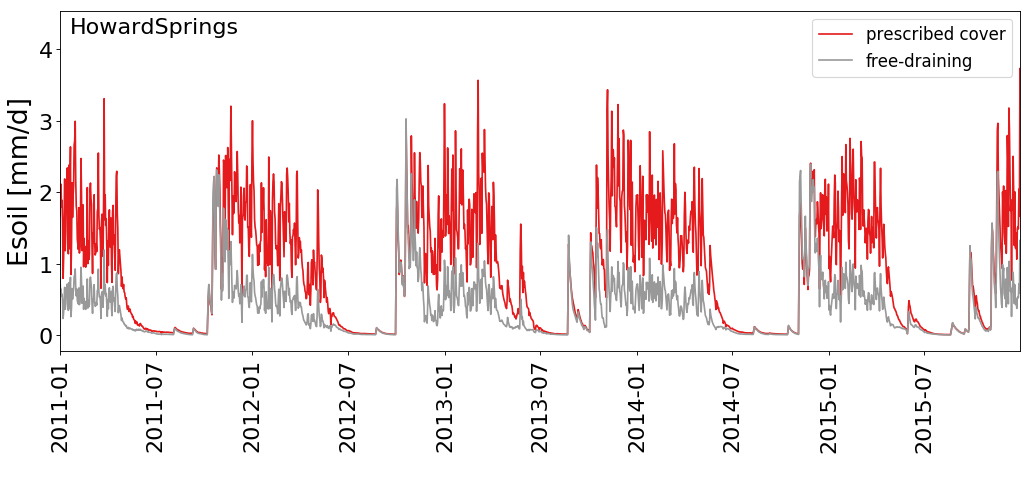

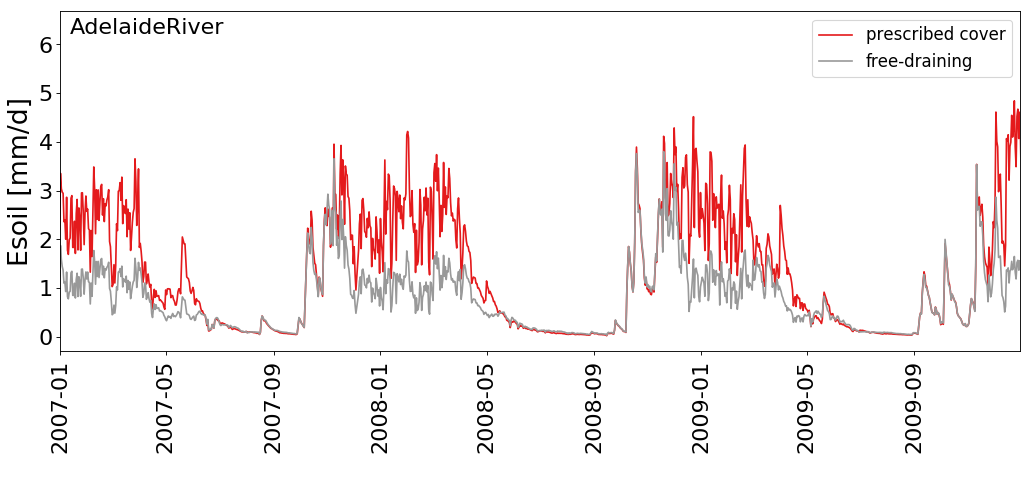

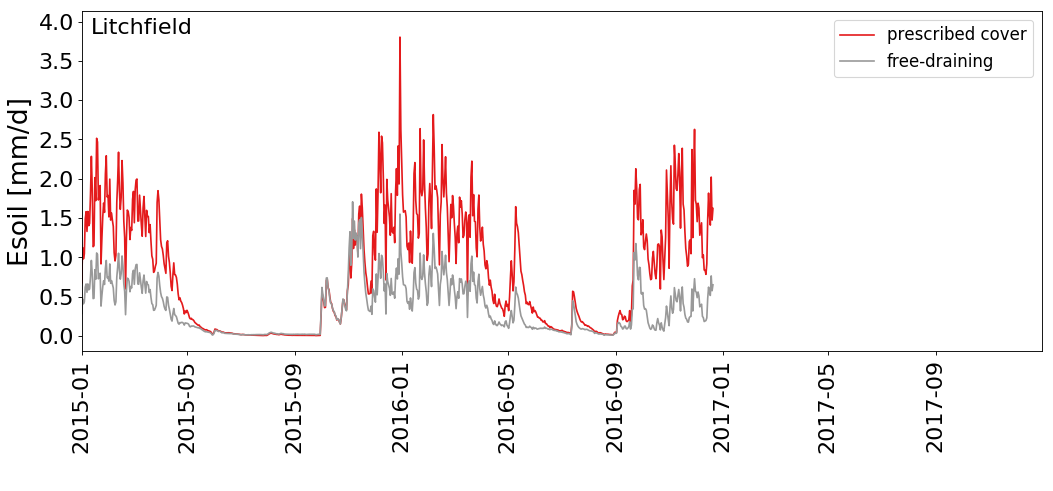

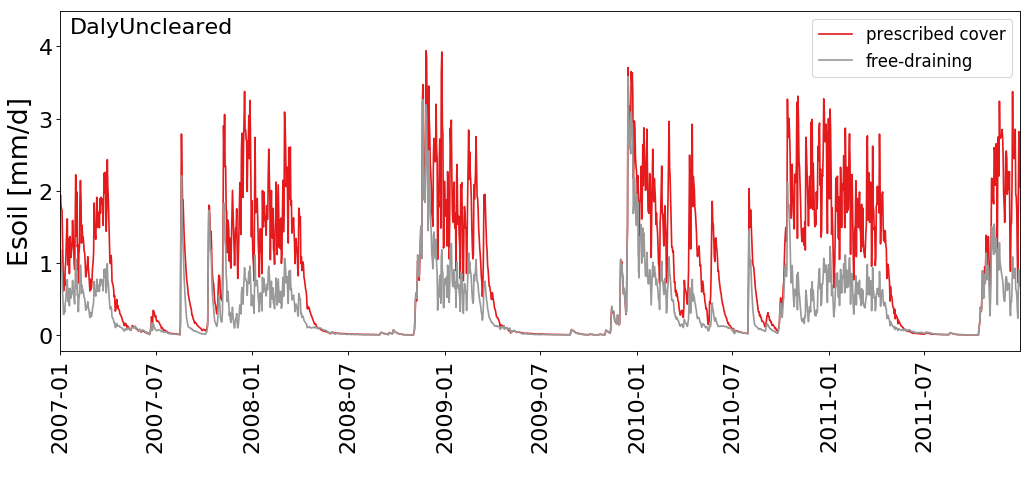

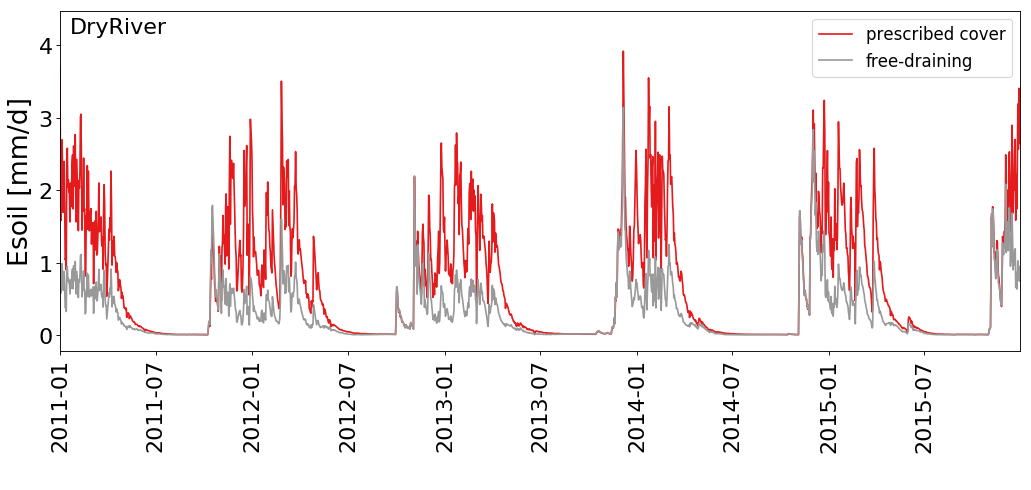

OSError: ../../data/VOM_output/additional_analyses/prescribed_cover/SturtPlains/sce_best/results_daily.txt not found.

In [10]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/HowardSprings/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.2/sce_best/results_daily.txt \
-v esoil -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--mf 1000 --ylabel "Esoil [mm/d]" \
--labels "prescribed cover" "free-draining" "dynamic watertables" --title "HowardSprings" --legend True  \
--palette Set1

#AdelaideRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/AdelaideRiver/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt \
-v esoil -ys 2007 -ye 2009 -w ../../data/VOM_input/AdelaideRiver/dailyweather.prn \
--mf 1000 --ylabel "Esoil [mm/d]" \
--labels "prescribed cover" "free-draining" "dynamic watertables" --title "AdelaideRiver" --legend True  \
--palette Set1

#Litchfield
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/Litchfield/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.2/sce_best/results_daily.txt \
-v esoil -ys 2015 -ye 2017 -w ../../data/VOM_input/Litchfield/dailyweather.prn \
--mf 1000 --ylabel "Esoil [mm/d]" \
--labels "prescribed cover" "free-draining" "dynamic watertables" --title "Litchfield" --legend True  \
--palette Set1

#DalyUncleared
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/DalyUncleared/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.2/sce_best/results_daily.txt \
-v esoil -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
--mf 1000 --ylabel "Esoil [mm/d]" \
--labels "prescribed cover" "free-draining" "dynamic watertables" --title "DalyUncleared" --legend True  \
--palette Set1

#DryRiver -- still on HPC
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/DryRiver/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt \
-v esoil -ys 2011 -ye 2015 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
--mf 1000 --ylabel "Esoil [mm/d]" \
--labels "prescribed cover" "free-draining" "old soil param." --title "DryRiver" --legend True  \
--palette Set1

#SturtPlains
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/SturtPlains/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.2/sce_best/results_daily.txt \
-v esoil -ys 2009 -ye 2014 -w ../../data/VOM_input/SturtPlains/dailyweather.prn \
--mf 1000 --ylabel "Esoil [mm/d]" \
--labels "prescribed cover" "free-draining" "dynamic watertables" --title "SturtPlains" --legend True  \
--palette Set1




The soil evaporation compensates for the reduced values of transpiration.

## Timeseries of assimilation


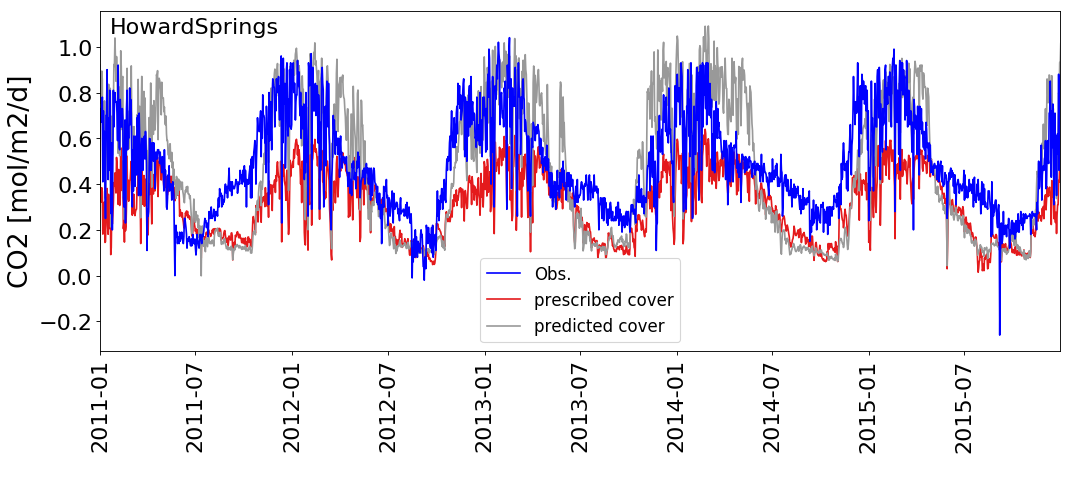

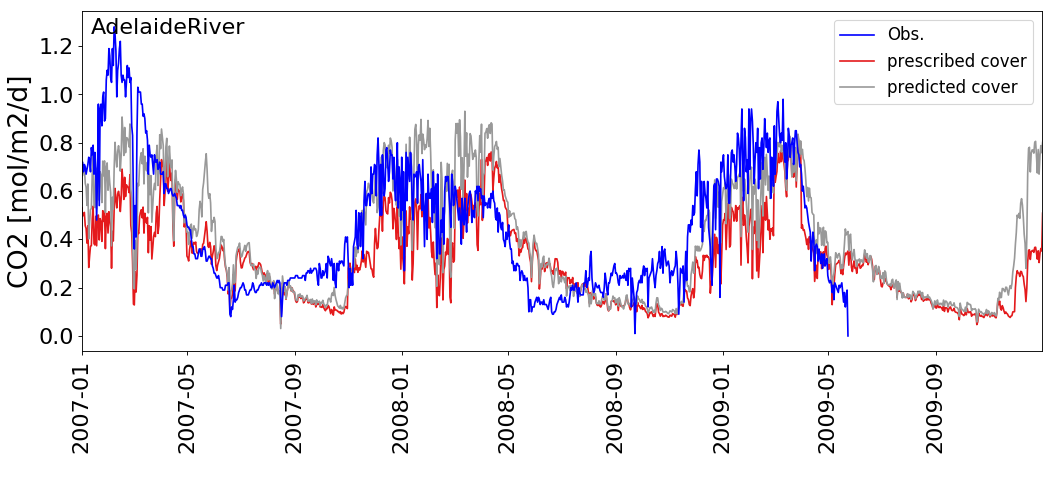

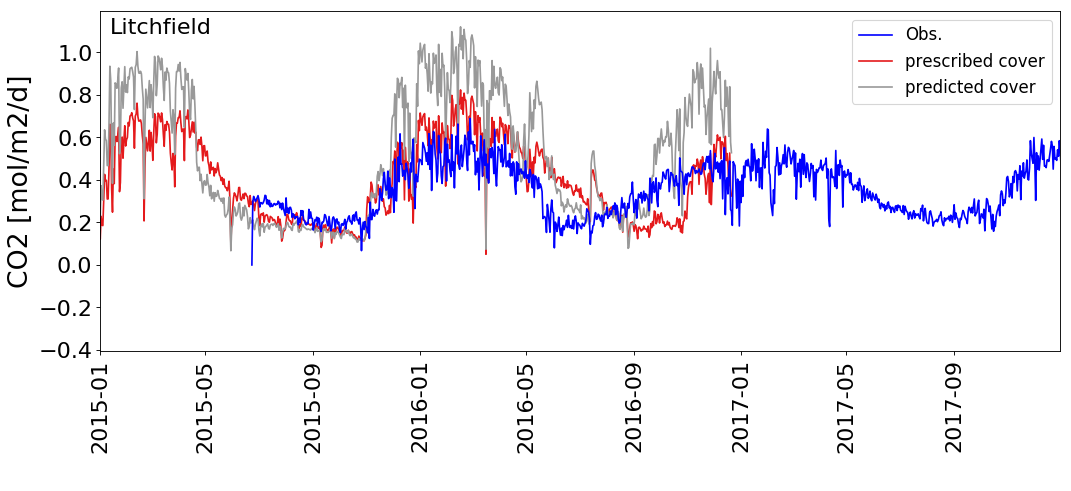

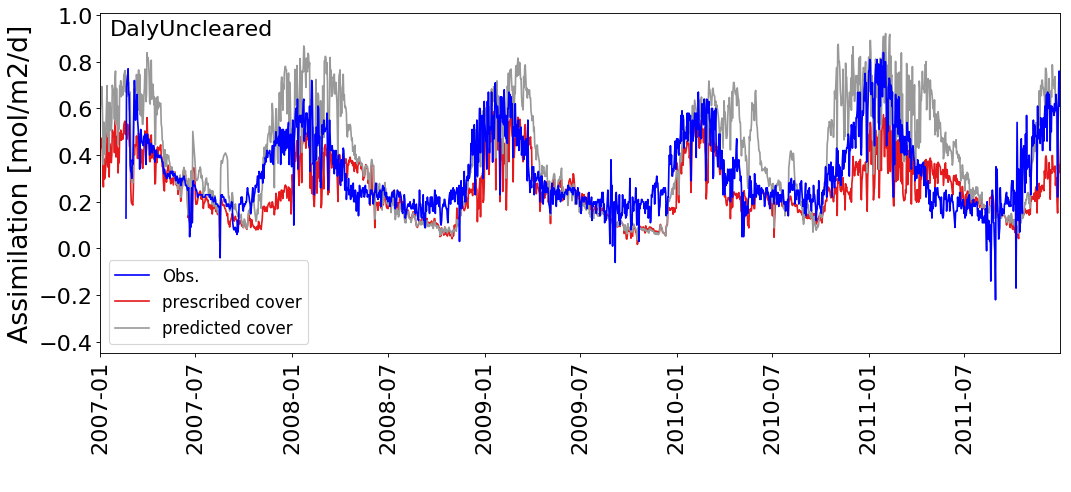

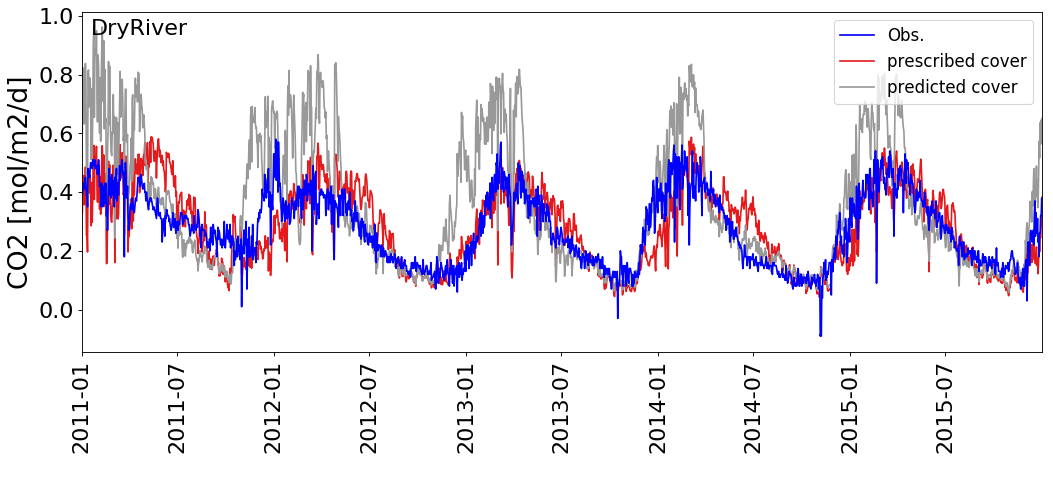

OSError: ../../data/VOM_output/additional_analyses/prescribed_cover/SturtPlains/sce_best/results_daily.txt not found.

In [14]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/HowardSprings/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.2/sce_best/results_daily.txt \
-v asstot -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "CO2 [mol/m2/d]" \
--labels "prescribed cover"  "predicted cover" --title "HowardSprings" --legend True  \
--palette Set1

#AdelaideRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/AdelaideRiver/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt \
-v asstot -ys 2007 -ye 2009 -w ../../data/VOM_input/AdelaideRiver/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_adelaide.txt --mf_obs -1 --ylabel "CO2 [mol/m2/d]" \
--labels "prescribed cover"  "predicted cover"  --title "AdelaideRiver" --legend True  \
--palette Set1

#Litchfield
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/Litchfield/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.2/sce_best/results_daily.txt \
-v asstot -ys 2015 -ye 2017 -w ../../data/VOM_input/Litchfield/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_litch.txt --mf_obs -1 --ylabel "CO2 [mol/m2/d]" \
--labels "prescribed cover"  "predicted cover" --title "Litchfield" --legend True  \
--palette Set1

#DalyUncleared
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/DalyUncleared/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.2/sce_best/results_daily.txt \
-v asstot -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_daly.txt --mf_obs -1 --ylabel "Assimilation [mol/m2/d]" \
--labels "prescribed cover" "predicted cover" --title "DalyUncleared" --legend True  \
--palette Set1

#DryRiver -- still on HPC
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/DryRiver/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt \
-v asstot -ys 2011 -ye 2015 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_dry.txt --mf_obs -1 --ylabel "CO2 [mol/m2/d]" \
--labels "prescribed cover"  "predicted cover"  --title "DryRiver" --legend True  \
--palette Set1

#SturtPlains
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/SturtPlains/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.2/sce_best/results_daily.txt \
-v asstot -ys 2009 -ye 2014 -w ../../data/VOM_input/SturtPlains/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_sturt.txt --mf_obs -1 --ylabel "CO2 [mol/m2/d]" \
--labels "prescribed cover"  "predicted cover" --title "SturtPlains" --legend True  \
--palette Set1






- The prescribed cover generally fixes the delay in decaying $CO_2$-updates at the end of the wet season
- The wet season $CO_2$ update is for Adelaide now underestimated, in the other cases the results are similar or slightly better


## Parameters

<Figure size 1280x400 with 0 Axes>

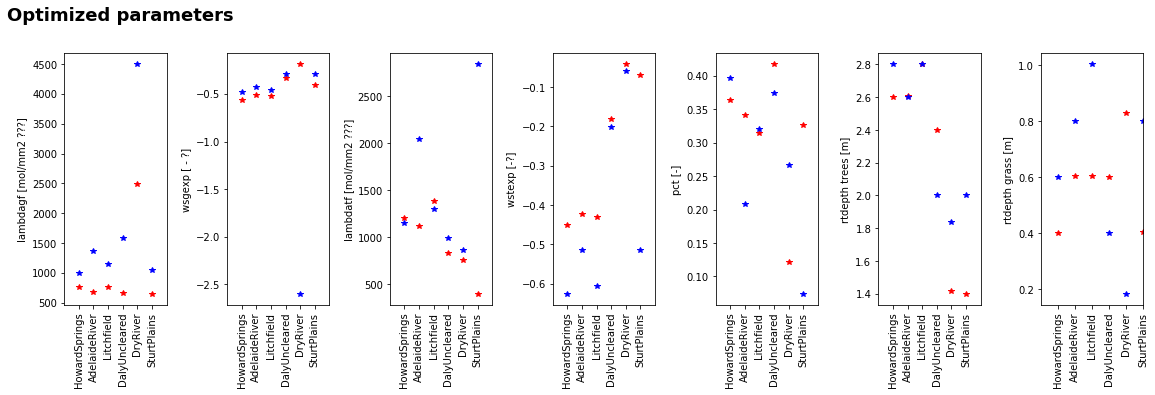

In [7]:
#plot parameters

basin = ["HowardSprings", "AdelaideRiver", "Litchfield", "DalyUncleared", "DryRiver", "SturtPlains"]



fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, ((ax0, ax1, ax2, ax3, ax4, ax5, ax6) )  = plt.subplots(nrows=1, ncols=7, figsize=(16, 5)) 

for ibasin in  np.array([0, 1, 2, 3, 4, 5]):  
    
    #loop over files and load
    try:
        params = np.loadtxt("../../data/VOM_output/" + 
             basin[ibasin] + "/freedrainage_cpcff1.0/sce_best/pars.txt") #mm/d
    except OSError:
        params = np.loadtxt("../../work/" + 
             basin[ibasin] + "/freedrainage_cpcff1.2/best/input/pars.txt") #mm/d
  
    try:
        params_pc = np.loadtxt("../../data/VOM_output/additional_analyses/prescribed_cover/" + 
             basin[ibasin] + "/sce_best/pars.txt") #mm/d
    except OSError:
        params_pc = np.loadtxt("../../work/additional_analyses/prescribed_cover/" + 
             basin[ibasin] + "/best/input/pars.txt") #mm/d
        
    #for irun in range(0,4):
    ax0.plot([ibasin], params[0], "r*" , label = "VOM" ) 
    ax0.plot([ibasin], params_pc[0], "b*" , label = "VOM pres. cover" ) 

    ax1.plot([ibasin], params[1], "r*" , label = "VOM" ) 
    ax1.plot([ibasin], params_pc[1], "b*" , label = "VOM pres. cover" ) 

    ax2.plot([ibasin], params[2], "r*" , label = "VOM" ) 
    ax2.plot([ibasin], params_pc[2], "b*" , label = "VOM pres. cover" ) 

    ax3.plot([ibasin], params[3], "r*" , label = "VOM" ) 
    ax3.plot([ibasin], params_pc[3], "b*" , label = "VOM pres. cover" ) 

    ax4.plot([ibasin], params[4], "r*" , label = "VOM" ) 
    ax4.plot([ibasin], params_pc[4], "b*" , label = "VOM pres. cover" ) 

    ax5.plot([ibasin], params[5], "r*" , label = "VOM" ) 
    ax5.plot([ibasin], params_pc[5], "b*" , label = "VOM pres. cover" ) 

    ax6.plot([ibasin], params[7], "r*" , label = "VOM" ) 
    ax6.plot([ibasin], params_pc[7], "b*" , label = "VOM pres. cover" ) 


#ax0.set_ylim([0,10])  
ax0.set_xlim( -1, 6  )     
ax0.set_xticks( [0,1,2,3,4,5] )  
ax0.set_xticklabels( basin, rotation=90 )  
ax0.set_ylabel("lambdagf [mol/mm2 ???]")  
   

#ax1.set_ylim([0,10])  
ax1.set_xlim( -1, 6  )     
ax1.set_xticks( [0,1,2,3,4,5] )  
ax1.set_xticklabels( basin, rotation=90 )  
ax1.set_ylabel("wsgexp [ - ?]")  

#ax2.set_ylim([0,1]) 
ax2.set_xlim( -1, 6  ) 
ax2.set_xticks( [0,1,2,3,4,5] )  
ax2.set_xticklabels( basin, rotation=90 )  
ax2.set_ylabel("lambdatf [mol/mm2 ???]")  

#ax0.set_ylim([0,1])  
ax3.set_xlim( -1, 6  )   
ax3.set_xticks( [0,1,2,3,4,5] )  
ax3.set_xticklabels( basin, rotation=90 )  
ax3.set_ylabel("wstexp [-?]")  

#ax1.set_ylim([0,10])  
ax4.set_xlim( -1, 6  )     
ax4.set_xticks( [0,1,2,3,4,5] )  
ax4.set_xticklabels( basin, rotation=90 )  
ax4.set_ylabel("pct [-]")  

#ax2.set_ylim([0,1]) 
ax5.set_xlim( -1, 6  ) 
ax5.set_xticks( [0,1,2,3,4,5] )  
ax5.set_xticklabels( basin, rotation=90 )  
ax5.set_ylabel("rtdepth trees [m]")  

ax6.set_xlim( -1, 5  ) 
ax6.set_xticks( [0,1,2,3,4,5] )  
ax6.set_xticklabels( basin, rotation=90 )  
ax6.set_ylabel("rtdepth grass [m]")  


plt.figtext( x=0, y=1.05, s="Optimized parameters", weight='bold', fontsize = 18)
plt.tight_layout()
    
plt.show()


## Relative errors


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


HowardSprings
../../data/VOM_output/additional_analyses/prescribed_cover/HowardSprings/sce_stats_best/ass_beststats.txt
AdelaideRiver
../../data/VOM_output/additional_analyses/prescribed_cover/AdelaideRiver/sce_stats_best/ass_beststats.txt
Litchfield
../../data/VOM_output/additional_analyses/prescribed_cover/Litchfield/sce_stats_best/ass_beststats.txt
DalyUncleared
../../data/VOM_output/additional_analyses/prescribed_cover/DalyUncleared/sce_stats_best/ass_beststats.txt
DryRiver
../../data/VOM_output/additional_analyses/prescribed_cover/DryRiver/sce_stats_best/ass_beststats.txt
SturtPlains
../../data/VOM_output/additional_analyses/prescribed_cover/SturtPlains/sce_stats_best/ass_beststats.txt


<Figure size 1280x400 with 0 Axes>

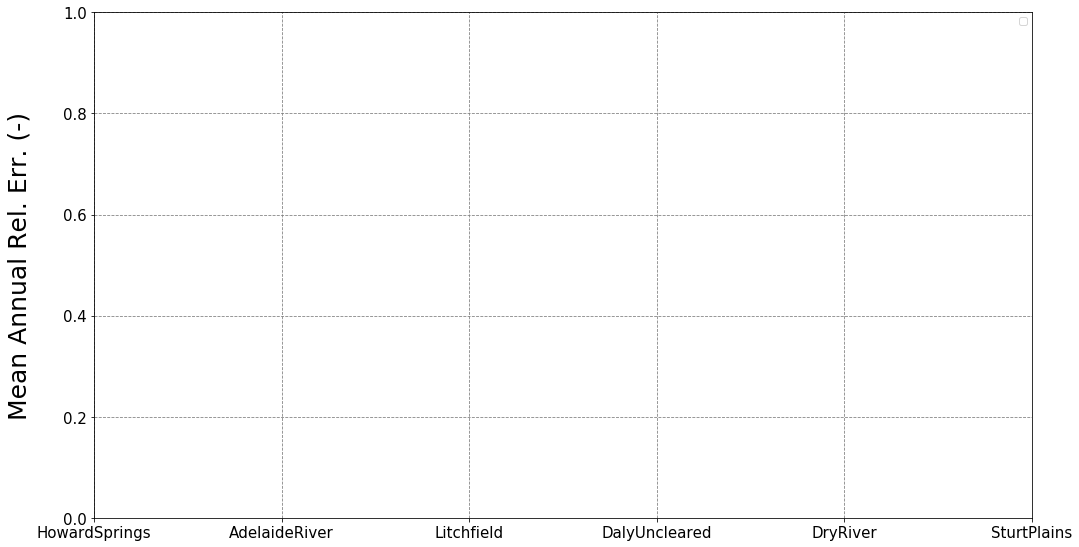

Missing files:  6


In [8]:
#load data
cpcff_vals = np.arange(0.2,2.8, 0.2)
study_sites = ["HowardSprings", "AdelaideRiver", "Litchfield", "DalyUncleared", "DryRiver", "SturtPlains" ]

labels = ''.join(str(e) for e in cpcff_vals)
labels = map(str, np.round(cpcff_vals,1) ) 
labels = list(labels)


fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, ax   = plt.subplots(nrows=1, ncols=1, figsize=(16, 8), sharex=True, sharey=True)   


i = 0

skipped = 0
i_basin = 0
add_labels = 1

#loop over all sites
for site in study_sites:
  
    print(site)
    

    try:
        pc_ebest_stats = np.genfromtxt("../../data/VOM_output/additional_analyses/prescribed_cover/" + 
         site +  "/sce_stats_best/evap_beststats.txt") 

        pc_assbest_stats = np.genfromtxt("../../data/VOM_output/additional_analyses/prescribed_cover/" + 
         site +  "/sce_stats_best/ass_beststats.txt")              

        ebest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff1.0/sce_stats_best/evap_beststats.txt") #mm/d

        assbest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff1.0/sce_stats_best/ass_beststats.txt") #mm/d          
        
        if(add_labels  == 1):
            print("add")
            ax.plot(i_basin, pc_ebest_stats[1], '*r', markersize=10, label="evaporation prescribed cover" ) 
            ax.plot(i_basin, pc_assbest_stats[1], '*b', markersize=10, label="assimilation prescribed cover" ) 
            ax.plot(i_basin, ebest_stats[1], '.r', markersize=10, label="evaporation" ) 
            ax.plot(i_basin, assbest_stats[1], '.b', markersize=10, label="assimilation" )
            add_labels = 0            
        else:
            ax.plot(i_basin, pc_ebest_stats[1], '*r', markersize=15 ) 
            ax.plot(i_basin, pc_assbest_stats[1], '*b', markersize=15 ) 
            ax.plot(i_basin, ebest_stats[1], '.r', markersize=10, ) 
            ax.plot(i_basin, assbest_stats[1], '.b', markersize=10) 

    except IOError:
        skipped = skipped + 1 
        print("../../data/VOM_output/additional_analyses/prescribed_cover/" + 
         site +  "/sce_stats_best/ass_beststats.txt")
       
        
        
    i_basin = i_basin + 1        

  
    ax.grid(b=True, which='major', color='grey', linestyle='--')

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(15)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(15)
        
    plt.xticks(np.arange(0,6), study_sites )
    plt.legend()

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
#plt.xlabel(r'cpcff ($\mu$$mol$ $m^3$ $s^{-1}$)', size = 25, labelpad=40)
plt.ylabel('Mean Annual Rel. Err. (-)', size = 25, labelpad=40)


plt.tight_layout()
plt.show()

    
print("Missing files: ", + skipped)

The relative errors between the mean annual fluxes show similar results as the timeseries. In most cases, the differences are small, but adding prescribed vegetation cover increases the error. Only for SturtPlains, there is a large improvement for the assimilation (from the blue dot to the blue star). 

In [9]:
sce_out = np.loadtxt("../../data/VOM_output/additional_analyses/prescribed_cover/DryRiver/sce/sce_out.txt") 




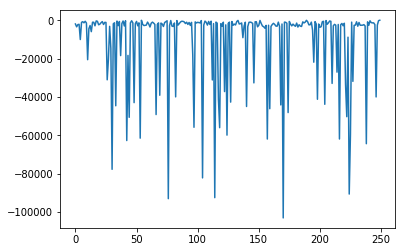

In [10]:
plt.plot(sce_out[-250:,6])

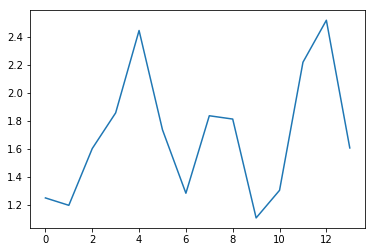

In [11]:
plt.plot(sce_out[ sce_out[:,6]>0, 4])

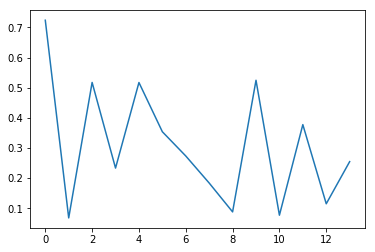

In [12]:
plt.plot(sce_out[ sce_out[:,6]>0, 5])

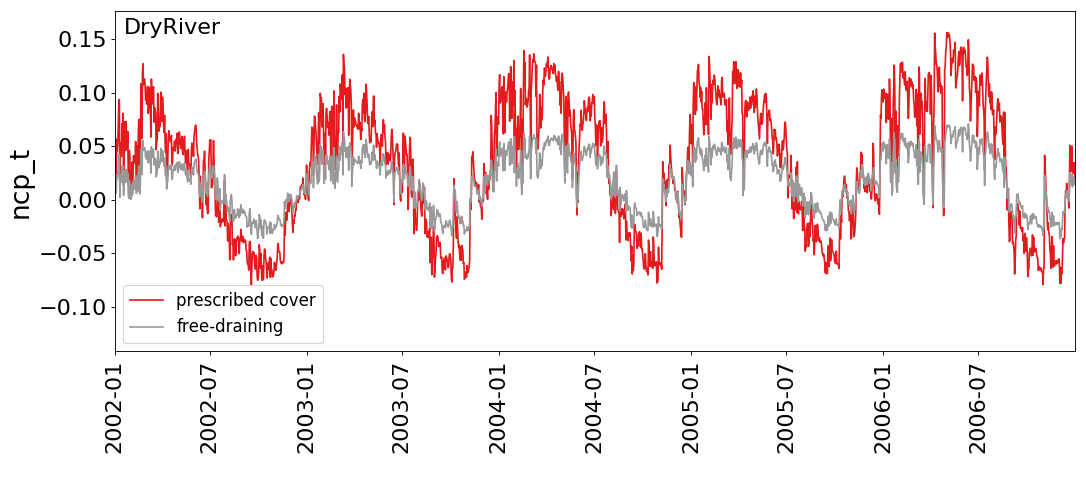

In [13]:
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/DryRiver/sce_best_tmp/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt \
-v ncp_t -ys 2011 -ye 2015 -ys 2002 -ye 2006 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
--ylabel "ncp_t" \
--labels "prescribed cover" "free-draining" "dynamic watertables" --title "DryRiver" --legend True  \
--palette Set1

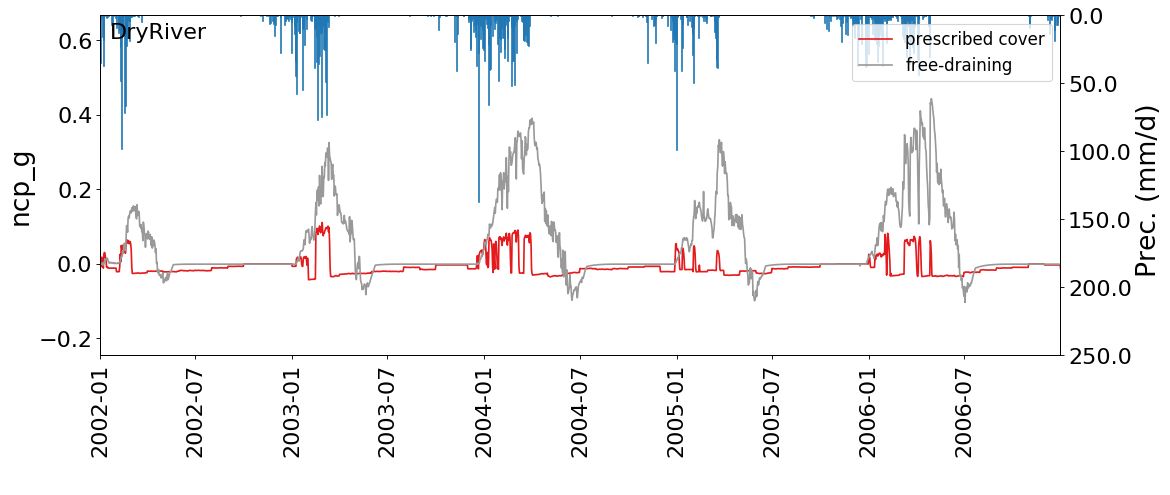

In [14]:
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/DryRiver/sce_best_tmp/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt \
-v ncp_g -ys 2011 -ye 2015 -ys 2002 -ye 2006 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
--ylabel "ncp_g" --plot_prec True \
--labels "prescribed cover" "free-draining" "dynamic watertables" --title "DryRiver" --legend True  \
--palette Set1

(730851.0, 732676.0)

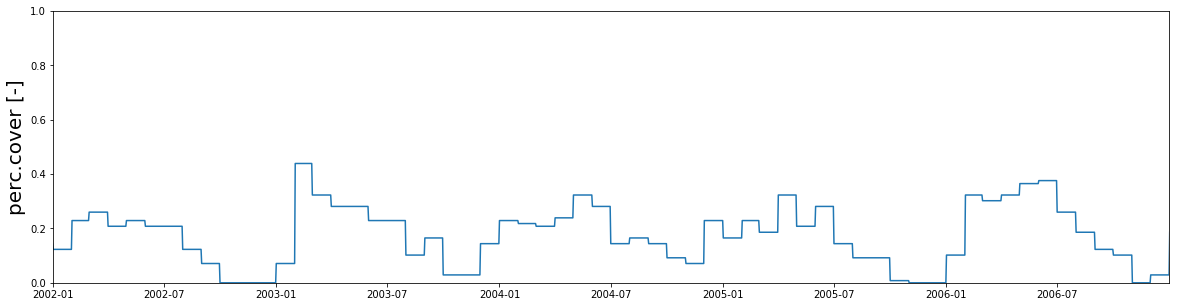

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,5))        
ax.plot(time, pc_dry[:,4])
ax.set_ylabel("perc.cover [-]", fontsize=20)
ax.set_ylim([0,1])
#ax.set_xlim([np.datetime64("01-01-2002"),np.datetime64("31-12-2006")])
ax.set_xlim([datetime(2002,1, 1), datetime( 2006 ,12, 31)]) 
#ax.text(time[2], 0.95, "DryRiver", ha='left', va='center', fontsize=20)


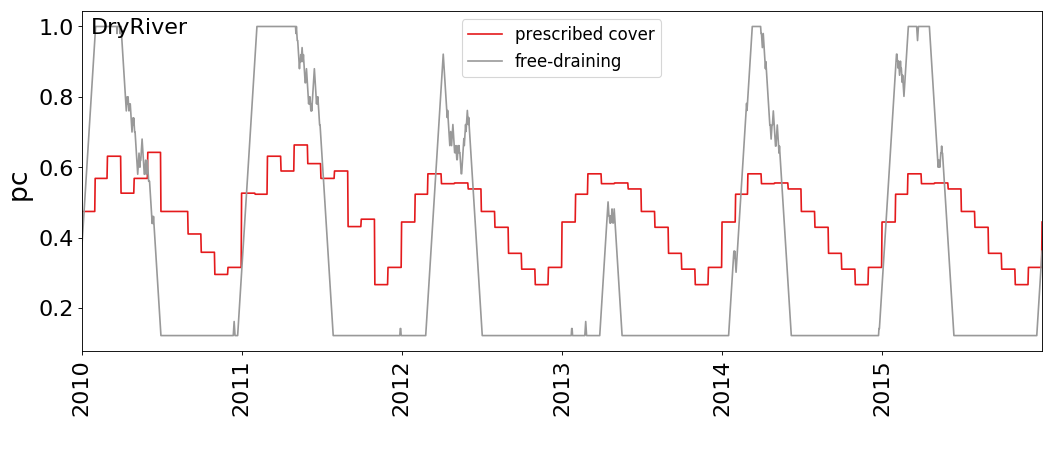

In [31]:
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/DryRiver/sce_best_tmp/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt \
-v pc -ys 2010 -ye 2015  -w ../../data/VOM_input/DryRiver/dailyweather.prn \
--ylabel "pc " \
--labels "prescribed cover" "free-draining" "old soil params" --title "DryRiver" --legend True  \
--palette Set1

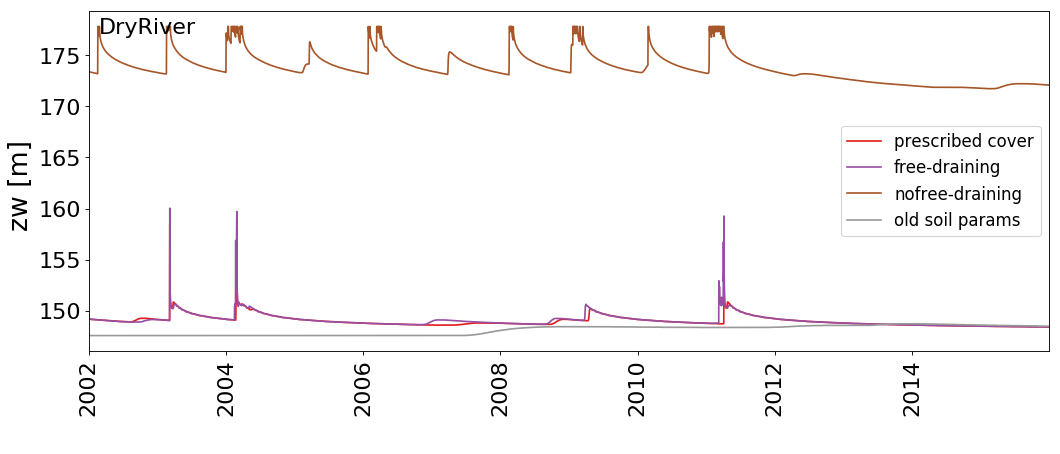

In [21]:
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/DryRiver/sce_best_tmp/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/nofreedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/DryRiver/sce_best_tmp_k/results_daily.txt \
-v zw -ys 2002 -ye 2015 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
--ylabel "zw [m] " \
--labels "prescribed cover" "free-draining" "nofree-draining" "old soil params" --title "DryRiver" --legend True  \
--palette Set1

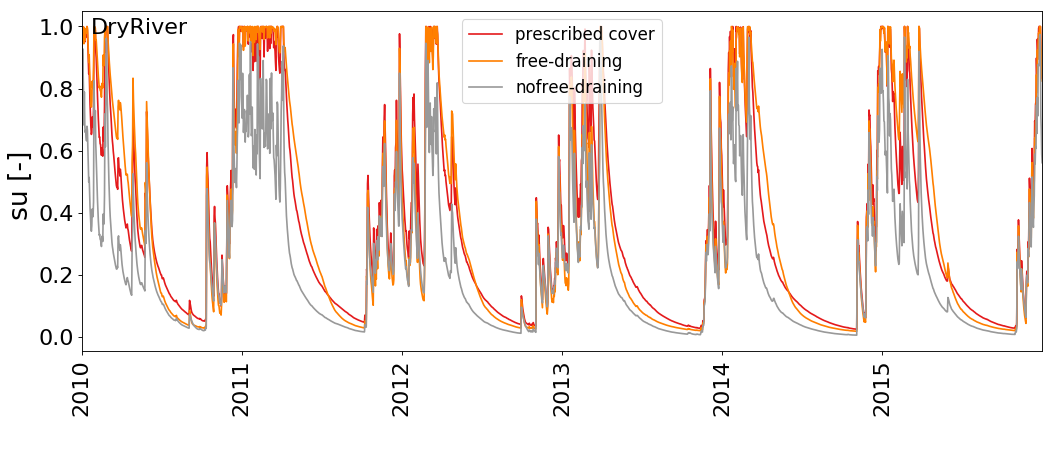

In [24]:
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/DryRiver/sce_best_tmp/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/DryRiver/sce_best_tmp_k/results_daily.txt \
-v su_1 -ys 2010 -ye 2015 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
--ylabel "su [-] " \
--labels "prescribed cover" "free-draining" "nofree-draining" "old soil params" --title "DryRiver" --legend True  \
--palette Set1

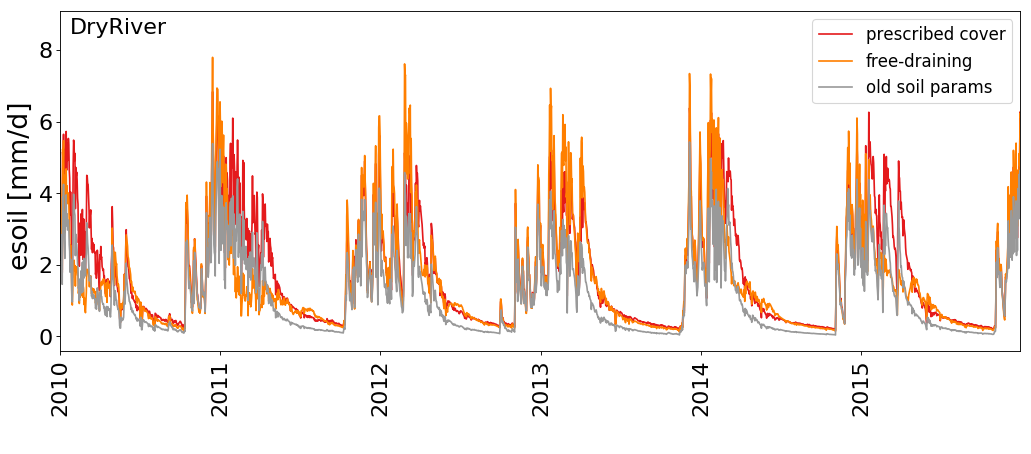

In [27]:
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/DryRiver/sce_best_tmp/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/DryRiver/sce_best_tmp_k/results_daily.txt \
-v esoil -ys 2010 -ye 2015 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
--ylabel "esoil [mm/d] " --mf 1000 \
--labels "prescribed cover" "free-draining" "old soil params" --title "DryRiver" --legend True  \
--palette Set1

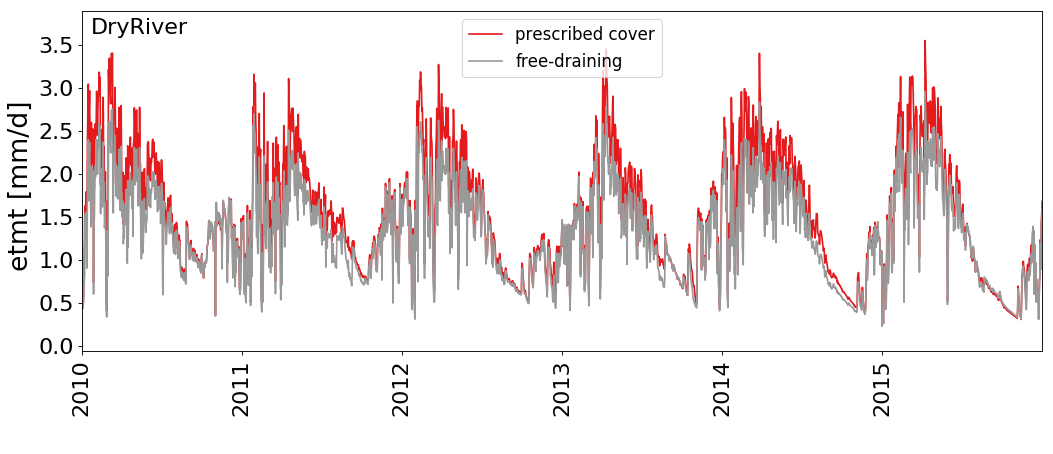

In [35]:
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/HowardSprings/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v etmt -ys 2010 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--ylabel "etmt [mm/d] " --mf 1000 \
--labels "prescribed cover" "free-draining" "old soil params" --title "DryRiver" --legend True  \
--palette Set1

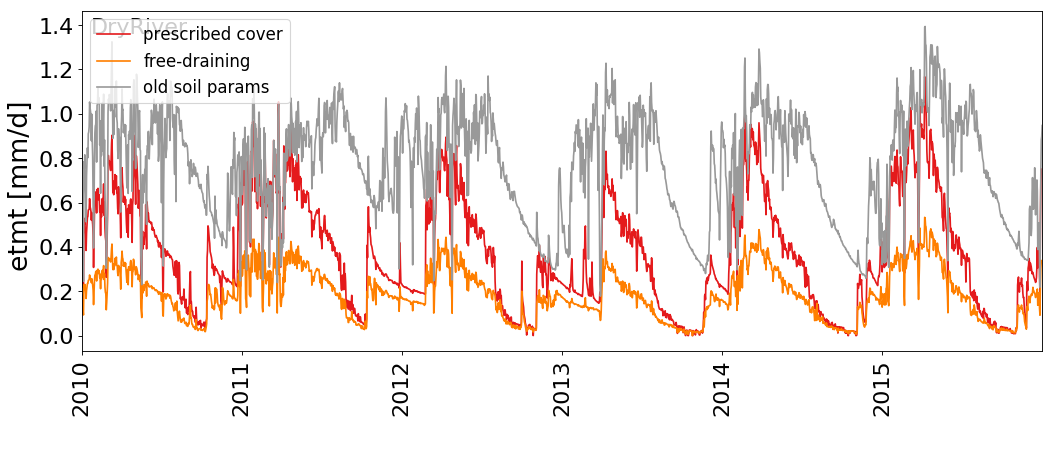

In [28]:
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/DryRiver/sce_best_tmp/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/DryRiver/sce_best_tmp_k/results_daily.txt \
-v etmt -ys 2010 -ye 2015 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
--ylabel "etmt [mm/d] " --mf 1000 \
--labels "prescribed cover" "free-draining" "old soil params" --title "DryRiver" --legend True  \
--palette Set1

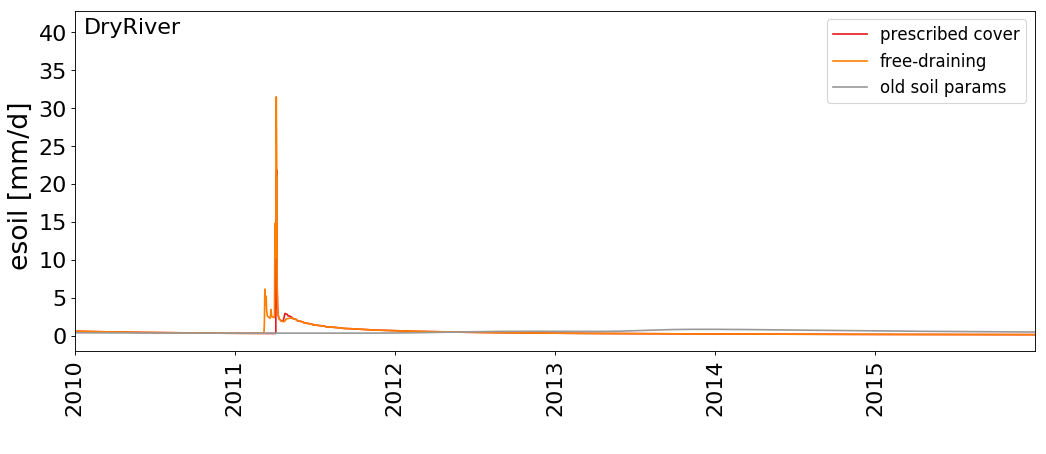

In [33]:
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/DryRiver/sce_best_tmp/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/DryRiver/sce_best_tmp_k/results_daily.txt \
-v spgfcf -ys 2010 -ye 2015 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
--ylabel "esoil [mm/d] " --mf 1000 \
--labels "prescribed cover" "free-draining" "old soil params" --title "DryRiver" --legend True  \
--palette Set1